In [1]:
## Read google drive file
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/gdrive/MyDrive/Project - Real Estate/feature-engineering.csv')

In [4]:
df.head(2)

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,...,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2,...,O66187314,NaN,NaN,450.0,0,0,0,0,0,0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2,...,S69145532,1617.0,NaN,NaN,1,0,0,0,0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3765 non-null   object 
 1   property_type        3765 non-null   object 
 2   link                 3765 non-null   object 
 3   sector               3765 non-null   object 
 4   society              3765 non-null   object 
 5   price                3765 non-null   float64
 6   area                 3765 non-null   float64
 7   price_per_sqft       3765 non-null   float64
 8   areaWithType         3765 non-null   object 
 9   bedRoom              3765 non-null   int64  
 10  bathroom             3765 non-null   int64  
 11  balcony              3765 non-null   object 
 12  additionalRoom       3765 non-null   object 
 13  address              3756 non-null   object 
 14  floorNum             3765 non-null   int64  
 15  facing               2679 non-null   o

In [6]:
df.shape

(3765, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3765 entries, 0 to 3764
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_name        3765 non-null   object 
 1   property_type        3765 non-null   object 
 2   link                 3765 non-null   object 
 3   sector               3765 non-null   object 
 4   society              3765 non-null   object 
 5   price                3765 non-null   float64
 6   area                 3765 non-null   float64
 7   price_per_sqft       3765 non-null   float64
 8   areaWithType         3765 non-null   object 
 9   bedRoom              3765 non-null   int64  
 10  bathroom             3765 non-null   int64  
 11  balcony              3765 non-null   object 
 12  additionalRoom       3765 non-null   object 
 13  address              3756 non-null   object 
 14  floorNum             3765 non-null   int64  
 15  facing               2679 non-null   o

In [8]:
df.isna().sum()

property_name             0
property_type             0
link                      0
sector                    0
society                   0
price                     0
area                      0
price_per_sqft            0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
address                   9
floorNum                  0
facing                 1086
agePossession             0
nearbyLocations         173
description               0
furnishDetails          974
rating                  337
property_id               0
super_built_up_area    1851
built_up_area          2068
carpet_area            1826
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
dtype: int64

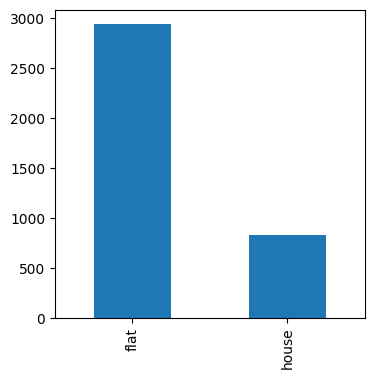

In [9]:
# property_type
plt.figure(figsize=(4,4))
df['property_type'].value_counts().plot(kind='bar')
plt.show()

In [10]:
# Observations
# Flats are in majority(75 percent) and there are less number of houses(~25 percent)
# No missing values

In [11]:
# society
df['society'].value_counts().shape

(669,)

In [12]:
df['society'].value_counts()

independent                             476
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
dlf new town heights                     41
                                       ... 
meditech apartment                        1
sbr minda sec-1 imt manesar               1
511 sarahah tower                         1
project krishna colony                    1
apex builders                             1
Name: society, Length: 669, dtype: int64

In [13]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

tulip violet                            0.022803
ss the leaf                             0.045303
shapoorji pallonji joyville gurugram    0.058984
dlf new town heights                    0.071450
signature global park                   0.082700
                                          ...   
orchid petals                           0.487382
mvn athens                              0.491639
ireo the corridors                      0.495591
ats kocoon                              0.499544
puri emerald bay                        0.503497
Name: society, Length: 75, dtype: float64

In [14]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 97,
 'Low (2-9)': 283,
 'Very Low (1)': 286}

In [15]:
df['society'].value_counts()

independent                             476
tulip violet                             75
ss the leaf                              74
shapoorji pallonji joyville gurugram     45
dlf new town heights                     41
                                       ... 
meditech apartment                        1
sbr minda sec-1 imt manesar               1
511 sarahah tower                         1
project krishna colony                    1
apex builders                             1
Name: society, Length: 669, dtype: int64

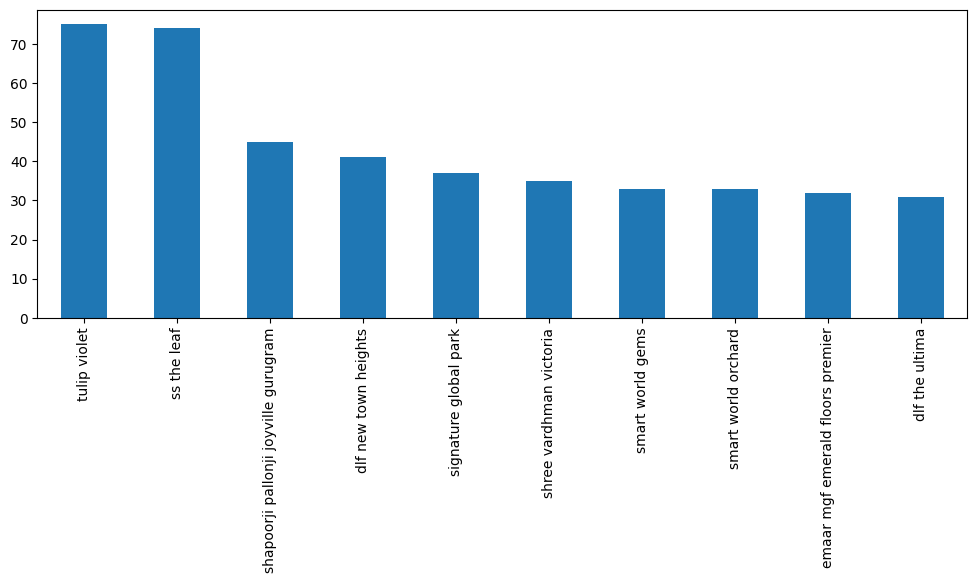

In [16]:
# top 10 socities
plt.figure(figsize=(12,4))
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')
plt.show()

In [17]:
# Observations
# Around 13% properties comes under independent tag.
# There are 675 societies.
# The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
# Very High (>100): Only 1 society has more than 100 listings.
# High (50-100): 2 societies have between 50 to 100 listings.
# Average (10-49): 98 societies fall in this range with 10 to 49 listings each.
# Low (2-9): 297 societies have between 2 to 9 listings.
# Very Low (1): A significant number, 321 societies, have only 1 listing.

In [18]:
# sector
# unique sectors
df['sector'].value_counts().shape

(110,)

<Axes: >

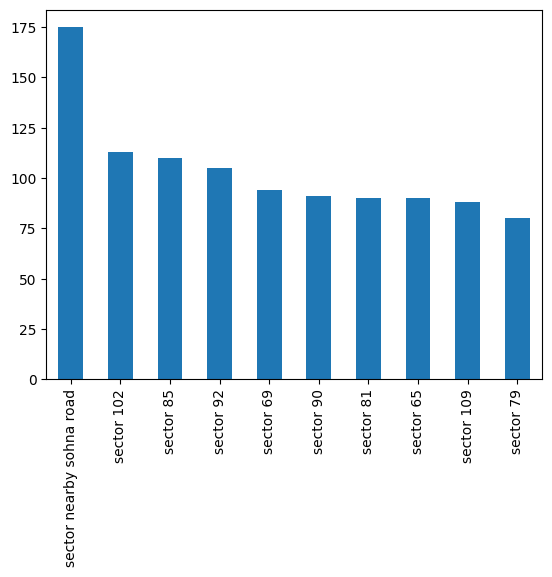

In [19]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [20]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 4,
 'High (50-100)': 24,
 'Average (10-49)': 61,
 'Low (2-9)': 20,
 'Very Low (1)': 1}

In [21]:
# Observations
# There are a total of 233 unique sectors in the dataset.
# Frequency distribution of sectors:
# Very High (>100): 4 sectors have more than 100 listings.
# High (50-100): 24 sectors have between 50 to 100 listings.
# Average (10-49): 63 sectors fall in this range with 10 to 49 listings each.
# Low (2-9): 60 sectors have between 2 to 9 listings.
# Very Low (1): 82 sectors with only 1 listing.

In [22]:
# Price
df['price'].isnull().sum()

0

In [23]:
df['price'].describe()

count    3765.000000
mean        2.493360
std         2.941064
min         0.070000
25%         0.930000
50%         1.500000
75%         2.700000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

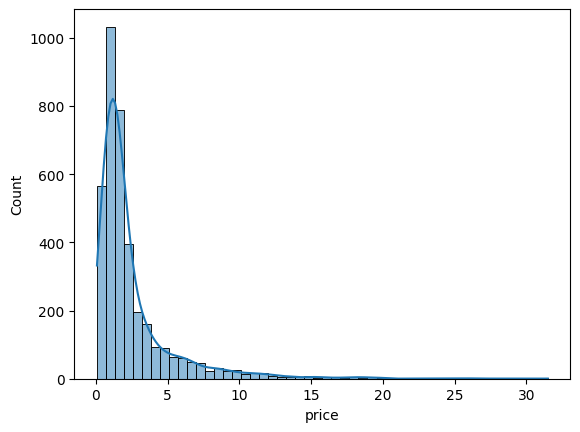

In [24]:
sns.histplot(df['price'], kde=True, bins=50)

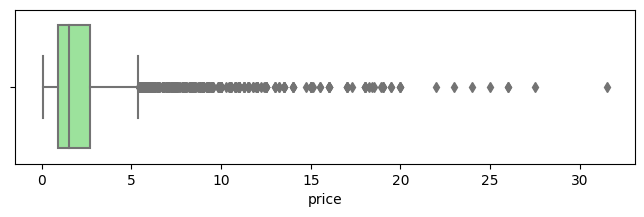

In [25]:
plt.figure(figsize=(8,2))
sns.boxplot(x=df['price'], color='lightgreen')
plt.show()

In [26]:
# Descriptive Statistics:

# Count: There are 3,660 non-missing price entries.
# Mean Price: The average price is approximately 2.53 crores.
# Median Price: The median (or 50th percentile) price is 1.52 crores.
# Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
# Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
# IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.
# Visualizations:

# Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
# Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
# Missing Values: There are 17 missing values in the price column.

In [27]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.3452614656678743 15.561666203268814


In [28]:
# Skewness: The price distribution has a skewness of approximately 3.36, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

# Kurtosis: The kurtosis value is approximately 15.78. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [29]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.432
0.99    15.036
Name: price, dtype: float64

In [30]:
# Quantile Analysis:

# 1% Quantile: Only 1% of properties are priced below 0.24 crores.
# 5% Quantile: 5% of properties are priced below 0.36 crores.
# 95% Quantile: 95% of properties are priced below 8.25 crores.
# 99% Quantile: 99% of properties are priced below 15 crores, indicating that very few properties are priced above this value.

In [31]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

1.77

In [32]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.725 5.355


In [33]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(422, 31)

In [34]:
outliers['price'].describe()

count    422.000000
mean       9.223294
std        4.090656
min        5.400000
25%        6.400000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

In [35]:
# Outliers Analysis (using IQR method):

# Based on the IQR method, there are 425 properties considered as outliers.
# These outliers have an average price of approximately 9.24 crores.
# The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: >

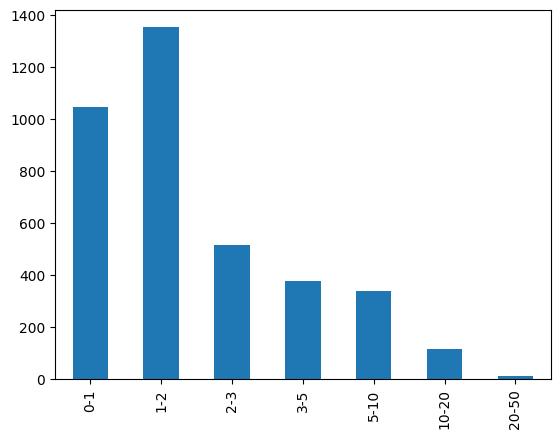

In [36]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

In [37]:
# The majority of properties are priced in the "0-1 crores" and "1-2 crores" ranges.
# There's a significant drop in the number of properties priced above "5 crores."

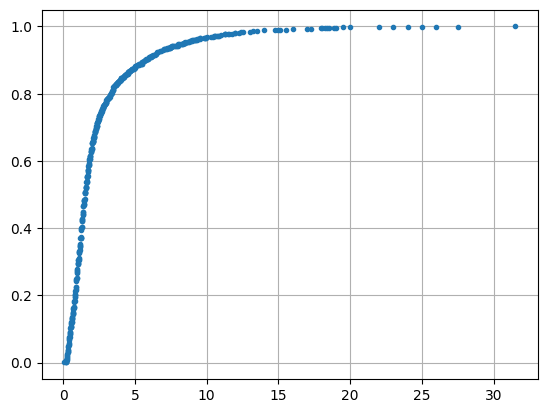

In [38]:
# ecdf plot
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

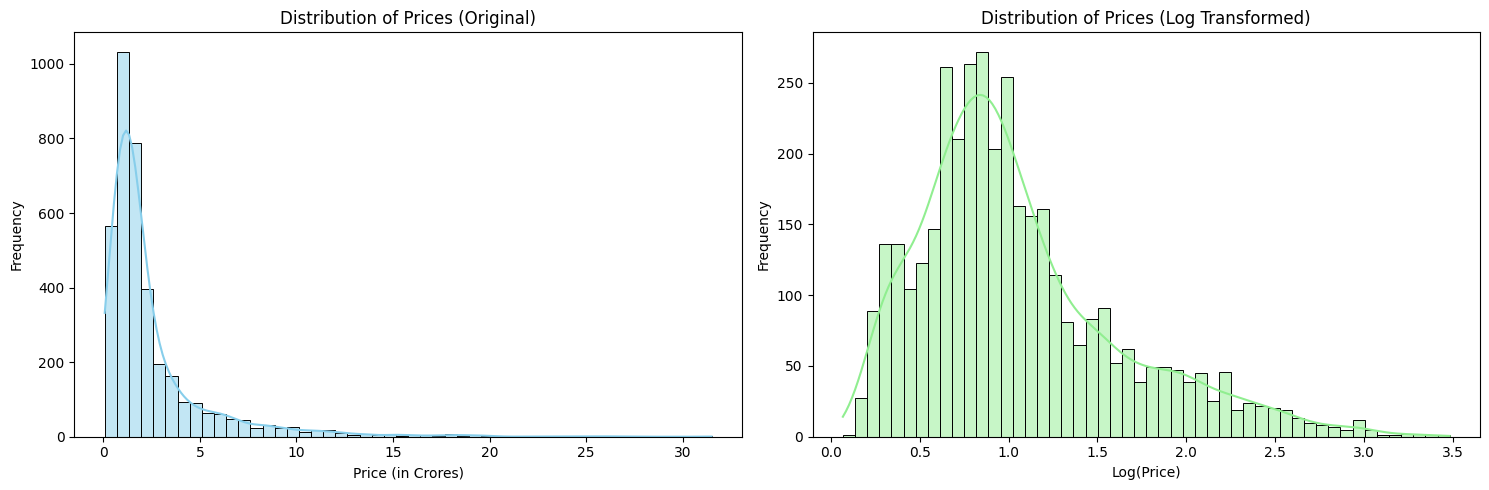

In [39]:
plt.figure(figsize=(15, 5))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [40]:
# np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

# Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [41]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0916156192775175 1.050085777020899


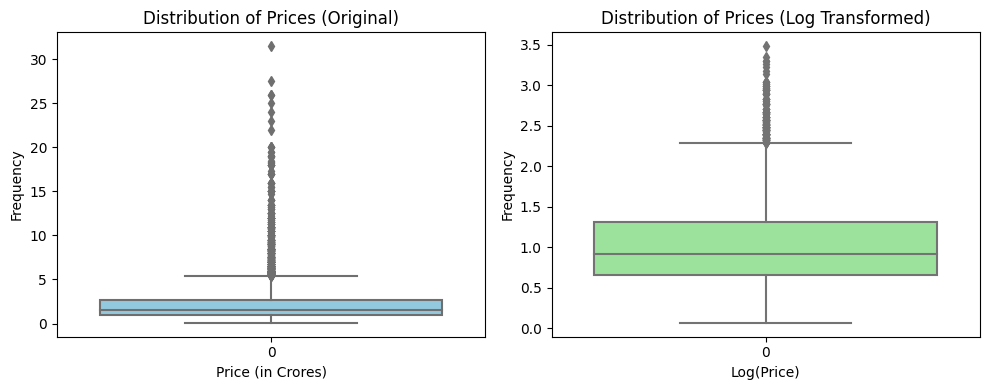

In [42]:
plt.figure(figsize=(10, 4))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [43]:
# price_per_sqft
df['price_per_sqft'].isnull().sum()

0

In [44]:
df['price_per_sqft'].describe()

count      3765.000000
mean      13703.524037
std       22651.115352
min           4.000000
25%        6801.000000
50%        9000.000000
75%       13750.000000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

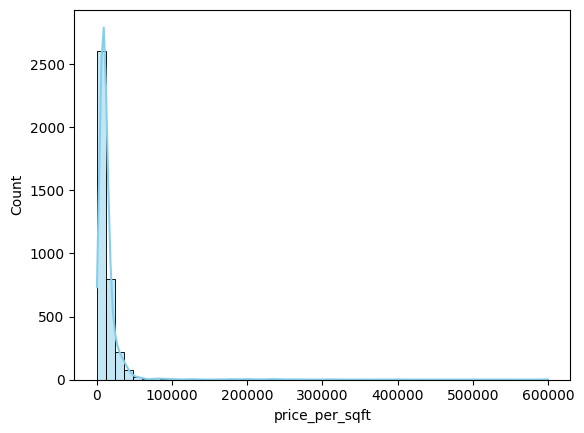

In [45]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

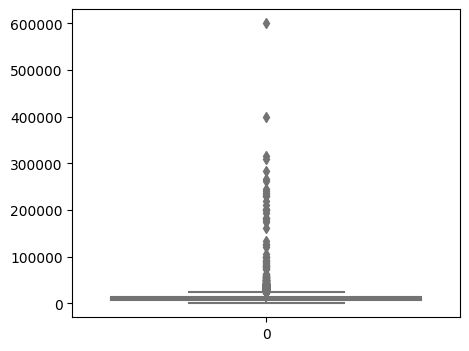

In [46]:
plt.figure(figsize=(5, 4))
sns.boxplot(df['price_per_sqft'], color='lightgreen')
plt.show()

In [47]:
# The box plot clearly shows several outliers, especially on the higher side.
# The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

# Observations:
# Potential Outliers
# Right Skewed
# 17 missing values

In [48]:
# bedRoom
df['bedRoom'].isnull().sum()

0

<Axes: >

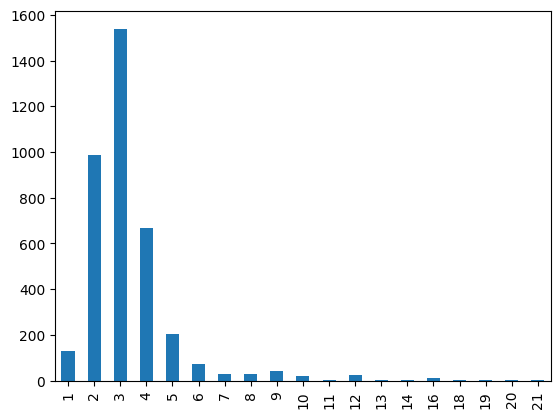

In [49]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bedRoom'>

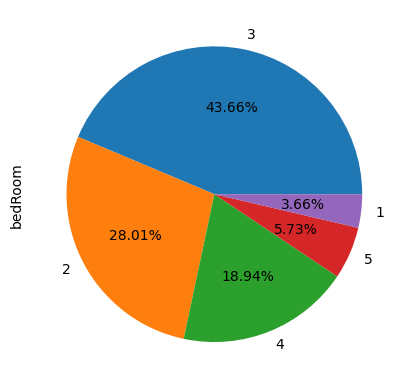

In [50]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [51]:
# bathroom
df['bathroom'].isnull().sum()

0

<Axes: >

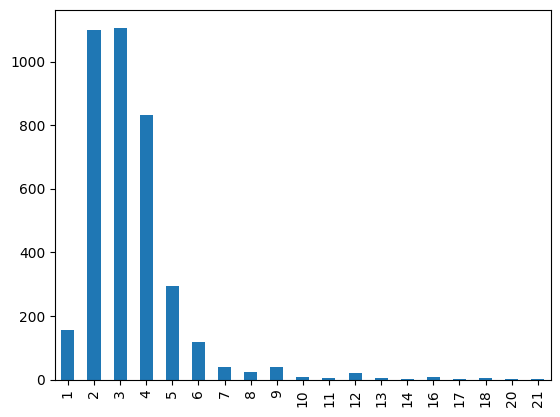

In [52]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='bathroom'>

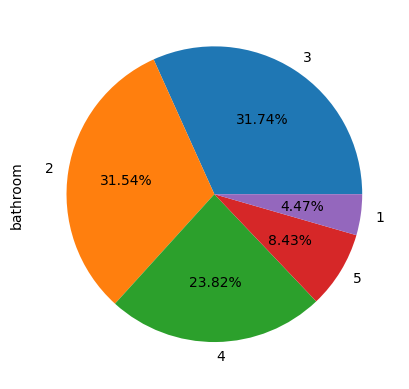

In [53]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [54]:
df.head()

,property_name,property_type,link,sector,society,price,area,price_per_sqft,areaWithType,bedRoom,...,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,2 BHK Flat in Sector 99A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 99a,laxmi pareena,0.30,450.0,6666.0,Carpet area: 450 (41.81 sq.m.),2,...,O66187314,NaN,NaN,450.0,0,0,0,0,0,0
1,2 BHK Flat in Sector 88A Gurgaon,flat,https://www.99acres.com/2-bhk-bedroom-apartmen...,sector 88a,godrej icon,1.31,1617.0,8100.0,Super Built up area 1617(150.22 sq.m.),2,...,S69145532,1617.0,NaN,NaN,1,0,0,0,0,0
2,4 Bedroom House for sale in Sector 54 Gurgaon,house,https://www.99acres.com/4-bhk-bedroom-independ...,sector 54,independent,3.75,160.0,234375.0,Plot area 160(14.86 sq.m.),4,...,B59842588,NaN,160.0,NaN,0,1,0,0,0,2
3,3 BHK Flat in Sector 37D Gurgaon,flat,https://www.99acres.com/3-bhk-bedroom-apartmen...,sector 37d,bptp terra,1.49,1838.0,8105.0,Super Built up area 1832(170.2 sq.m.)Carpet ar...,3,...,H70022084,1832.0,NaN,1580.0,0,0,0,0,1,0
4,4 BHK Flat in Sector 83 Gurgaon,flat,https://www.99acres.com/4-bhk-bedroom-apartmen...,sector 83,vatika gurgaon,1.42,1600.0,8875.0,Super Built up area 2390(222.04 sq.m.)Built Up...,4,...,V65295042,2390.0,2000.0,1600.0,1,1,0,0,0,0


In [55]:
# balcony
df['balcony'].isnull().sum()

0

<Axes: >

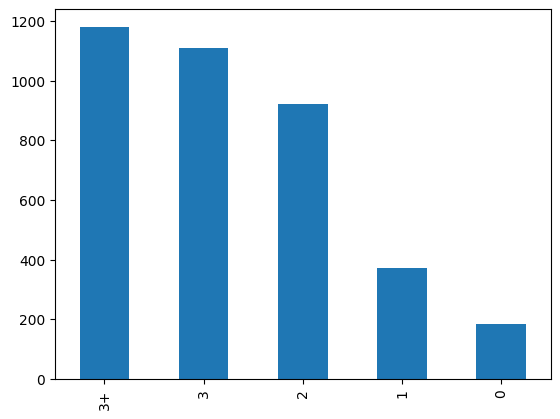

In [56]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='balcony'>

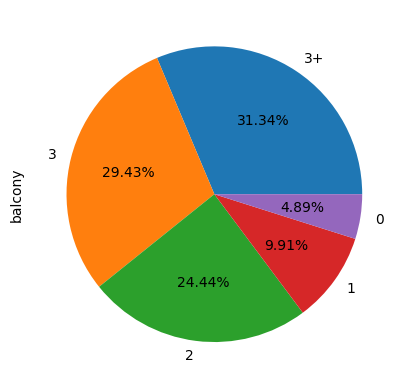

In [57]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

In [58]:
# floorNum
df['floorNum'].isnull().sum()

0

In [59]:
df['floorNum'].describe()

count    3765.000000
mean        6.827092
std         6.035813
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: >

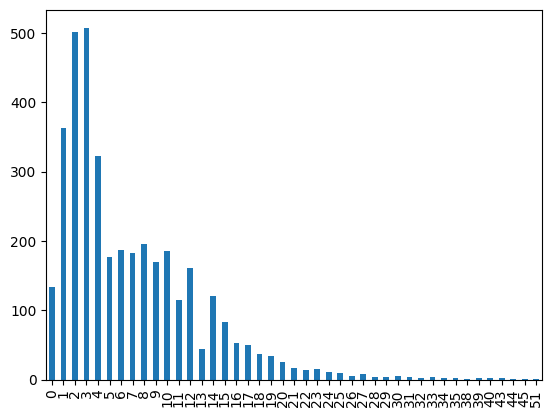

In [60]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

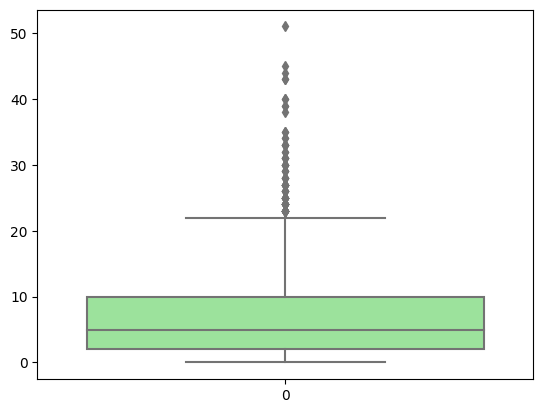

In [61]:
sns.boxplot(df['floorNum'], color='lightgreen')

The majority of the properties lie between the ground floor (0) and the 25th floor.

Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.

There are a few properties located at higher floors, but their frequency is much lower.

The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.

Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

In [62]:
# Facing

In [63]:
df['facing'].isnull().sum()

1086

In [64]:
df['facing'].fillna('NA',inplace=True)

In [65]:
df['facing'].value_counts()

NA            1086
East           637
North-East     636
North          397
West           250
South          233
North-West     199
South-East     172
South-West     155
Name: facing, dtype: int64

In [66]:
# agePossession

In [67]:
df['agePossession'].isnull().sum()

0

In [68]:
df['agePossession'].value_counts()

Relatively New        1665
New Property           622
Moderately Old         564
Undefined              332
Old Property           303
Under Construction     279
Name: agePossession, dtype: int64

In [69]:
# areas

In [70]:
# super built up area
df['super_built_up_area'].isnull().sum()

1851

In [71]:
df['super_built_up_area'].describe()

count     1914.000000
mean      1921.698302
std        767.358653
min         89.000000
25%       1457.000000
50%       1827.750000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

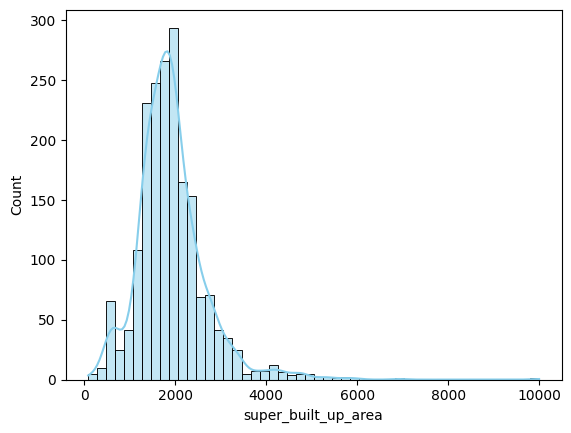

In [72]:
sns.histplot(df['super_built_up_area'], bins=50, color='skyblue', kde=True)

<Axes: >

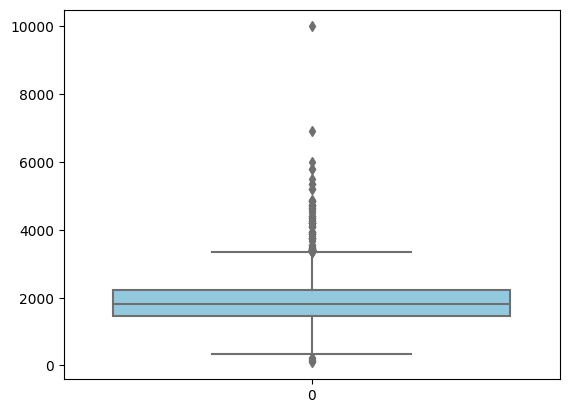

In [73]:
sns.boxplot(df['super_built_up_area'], color='skyblue')

In [74]:
# built up area
df['built_up_area'].isnull().sum()

2068

In [75]:
df['built_up_area'].describe()

count      1697.000000
mean       2367.310766
std       17904.335767
min           2.000000
25%        1115.000000
50%        1650.000000
75%        2367.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

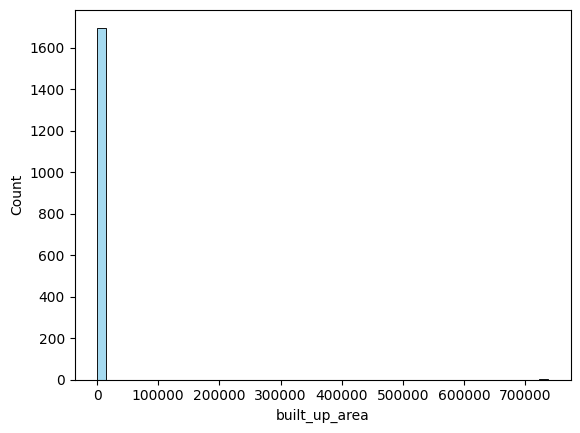

In [76]:
sns.histplot(df['built_up_area'], bins=50, color='skyblue', kde=False)

<Axes: >

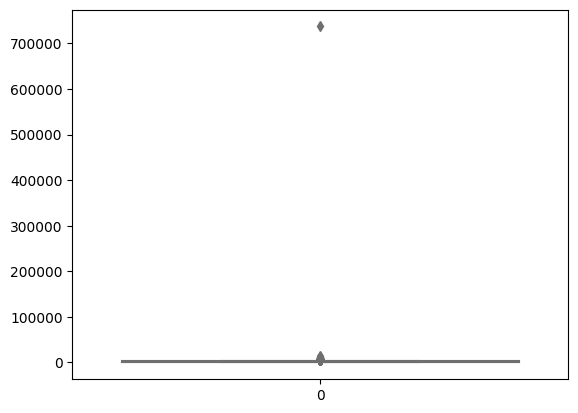

In [80]:
sns.boxplot(df['built_up_area'], color='skyblue')

In [81]:
# carpet area
df['carpet_area'].isnull().sum()

1826

In [82]:
df['carpet_area'].describe()

count      1939.000000
mean       2485.921907
std       22403.898601
min          15.000000
25%         827.000000
50%        1294.000000
75%        1784.500000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

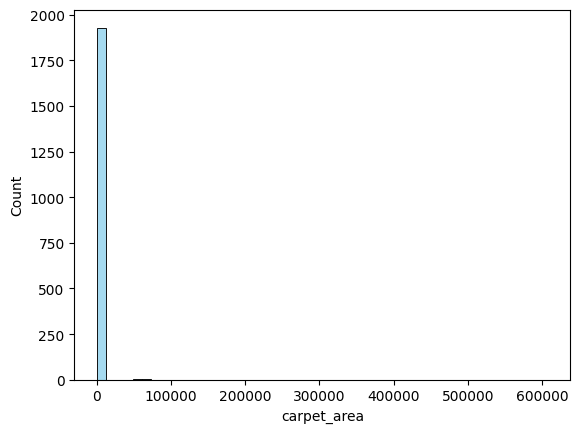

In [83]:
sns.histplot(df['carpet_area'], bins=50, color='skyblue', kde=False)

<Axes: >

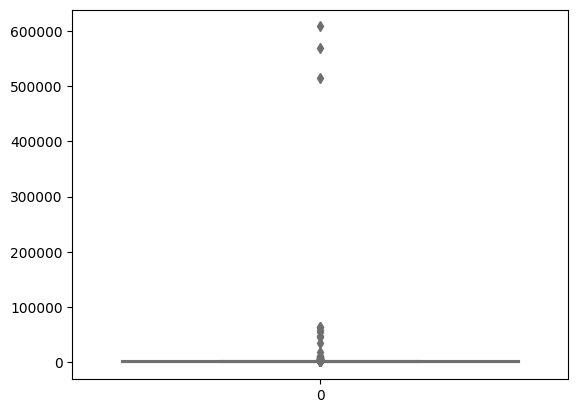

In [84]:
sns.boxplot(df['carpet_area'], color='skyblue')

In [85]:
df.iloc[:,16:]

,agePossession,nearbyLocations,description,furnishDetails,rating,property_id,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type
0,Undefined,NaN,"2bhk affordable, ready to shift in sec 99a lax...","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'N...","['Environment4 out of 5', 'Lifestyle3 out of 5...",O66187314,NaN,NaN,450.0,0,0,0,0,0,0
1,Relatively New,"['JMS Crosswalk', ""Saint Paul's School"", 'Indu...",This lovely 2 bhk apartment/flat in sector 88a...,NaN,NaN,S69145532,1617.0,NaN,NaN,1,0,0,0,0,0
2,Moderately Old,"['Sector 53-54 metro station', 'Sector 54 chow...",East facing old house ready to move in f block...,"['6 Fan', '1 Exhaust Fan', '3 Geyser', '7 Ligh...","['Environment4 out of 5', 'Safety4 out of 5', ...",B59842588,NaN,160.0,NaN,0,1,0,0,0,2
3,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...",Located in the popular residential address of ...,"['1 Wardrobe', '1 Chimney', '1 Modular Kitchen...","['Green Area4.5 out of 5', 'Construction4.5 ou...",H70022084,1832.0,NaN,1580.0,0,0,0,0,1,0
4,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83...",This is a 4 bhk row flat the flat occupies a s...,NaN,"['Green Area5 out of 5', 'Construction4.5 out ...",V65295042,2390.0,2000.0,1600.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3760,Moderately Old,"['Sri Radhe Krishna Temple', 'Standard charter...",3bhk duplex villa for sale in rosewood city\nF...,"['3 Wardrobe', '6 Fan', '4 Light', '1 Modular ...","['Environment4 out of 5', 'Safety5 out of 5', ...",Z68912250,NaN,1900.0,1850.0,0,0,1,1,0,0
3761,Old Property,"['HUDA Sector 23 Market', 'Palam triangle', 'P...",342 sq yards size of 2bhk with servant room av...,"['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Environment5 out of 5', 'Lifestyle4 out of 5...",X70075340,NaN,125.0,100.0,0,0,0,0,1,0
3762,Moderately Old,"['Sector 55-56 Metro Station', 'Eros City Squa...",Check out this 3 bhk apartment for sale in the...,"['5 Fan', '15 Light', 'No AC', 'No Bed', 'No C...","['Green Area5 out of 5', 'Construction4 out of...",D69391210,2605.0,2400.0,2200.0,0,1,0,0,0,0
3763,Relatively New,"['Airia Mall', 'Golf Course Extension Road', '...","Situated in sector 67 gurgaon, m3m merlin is a...","['1 Water Purifier', '5 Fan', '1 Fridge', '1 E...","['Green Area4 out of 5', 'Construction4 out of...",K69205204,2048.0,NaN,NaN,0,0,1,0,0,1


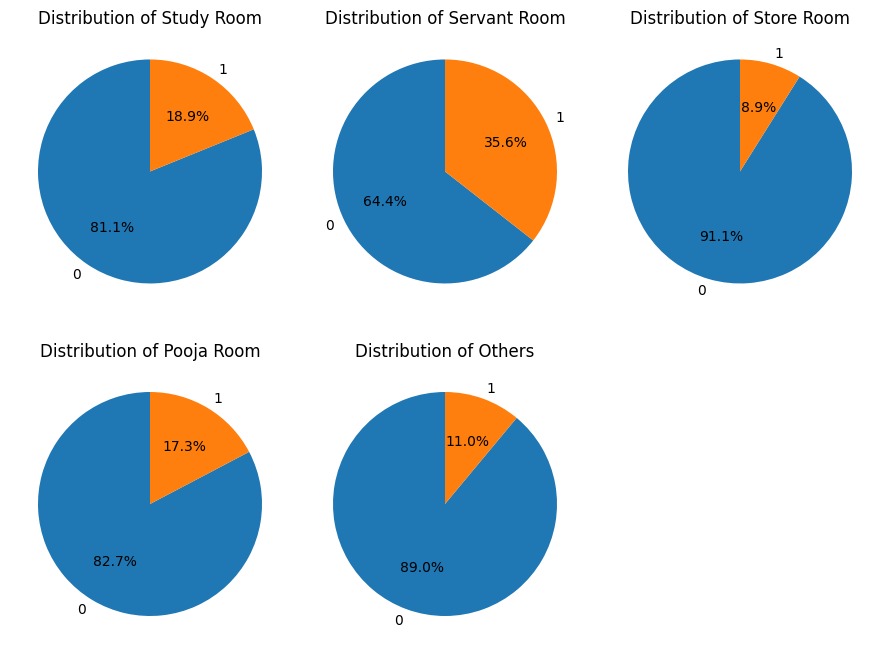

In [86]:
# additional rooms
plt.figure(figsize=(9, 7))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [87]:
# furnishing_type
df['furnishing_type'].value_counts()

0    2483
2    1070
1     212
Name: furnishing_type, dtype: int64

<Axes: ylabel='furnishing_type'>

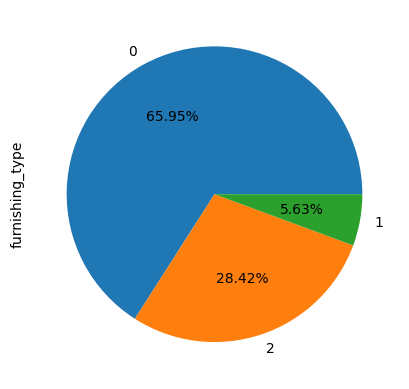

In [88]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')